# FIFA 21 Analysis

**Author:** Roy Njuguna  
**Date:** September 3, 2024  
**Version:** 1.0 

---
## Fifa 21 dataset
Raw dataset of EA Sports' latest installment of their hit FIFA series - FIFA21, scraped from sofifa.com and obtained from kaggle public datasets

## Tools used for analysis
* Python was used data cleaning 
* SQL was used for further analysis to analyze part of the data
* Tableau was used for visualization

## FIFA 21 Dataset Feature Descriptions

- **ID**: Unique identifier for each player.
- **Name**: The commonly known name of the player.
- **LongName**: Full name of the player.
- **photoUrl**: URL link to the player's photo.
- **playerUrl**: URL link to the player's profile.
- **Nationality**: The country the player represents internationally.
- **Age**: The player's age.
- **↓OVA**: The player's overall rating.
- **POT**: The potential rating the player can achieve.
- **Club**: The club for which the player currently plays.
- **Contract**: Details of the player's contract duration with the club.
- **Positions**: Positions the player can play on the field.
- **Height**: Player's height (typically in centimeters).
- **Weight**: Player's weight (typically in kilograms).
- **Preferred Foot**: The player's dominant foot (Left/Right).
- **BOV**: Best overall rating for the player in their best position.
- **Best Position**: The position where the player is most effective.
- **Joined**: The date the player joined their current club.
- **Loan Date End**: The end date of the player's loan contract (if applicable).
- **Value**: The market value of the player.
- **Wage**: The weekly wage of the player.
- **Release Clause**: The amount required to trigger the player's release from their contract.
- **Attacking**: A composite rating of the player's attacking skills.
- **Crossing**: The player's ability to deliver accurate crosses.
- **Finishing**: The player's ability to finish scoring opportunities.
- **Heading Accuracy**: The player's accuracy when heading the ball.
- **Short Passing**: The player's skill in short-range passing.
- **Volleys**: The player's ability to strike the ball in mid-air.
- **Skill**: A composite rating of the player's technical skills.
- **Dribbling**: The player's ability to control the ball while moving.
- **Curve**: The player's ability to bend the ball in the air.
- **FK Accuracy**: The player's accuracy when taking free kicks.
- **Long Passing**: The player's skill in long-range passing.
- **Ball Control**: The player's ability to control the ball effectively.
- **Movement**: A composite rating of the player's physical movement skills.
- **Acceleration**: How quickly the player can reach their top speed.
- **Sprint Speed**: The player's top speed when sprinting.
- **Agility**: The player's ability to change direction quickly.
- **Reactions**: The player's response time to in-game events.
- **Balance**: The player's ability to maintain balance under physical pressure.
- **Power**: A composite rating of the player's physical power.
- **Shot Power**: The power behind the player's shots.
- **Jumping**: The player's ability to jump vertically.
- **Stamina**: The player's endurance level throughout a match.
- **Strength**: The player's physical strength.
- **Long Shots**: The player's ability to score from long distances.
- **Mentality**: A composite rating of the player's mental attributes.
- **Aggression**: The player's level of aggressiveness in play.
- **Interceptions**: The player's ability to intercept passes.
- **Positioning**: The player's ability to position themselves effectively in attacking situations.
- **Vision**: The player's ability to see and execute potential passes.
- **Penalties**: The player's ability to score from penalty kicks.
- **Composure**: The player's ability to perform under pressure.
- **Defending**: A composite rating of the player's defensive skills.
- **Marking**: The player's ability to mark opponents.
- **Standing Tackle**: The player's ability to win tackles while standing.
- **Sliding Tackle**: The player's ability to win tackles while sliding.
- **Goalkeeping**: A composite rating of the player's goalkeeping abilities.
- **GK Diving**: The goalkeeper's ability to dive and make saves.
- **GK Handling**: The goalkeeper's ability to catch and hold onto the ball.
- **GK Kicking**: The goalkeeper's ability to kick the ball accurately.
- **GK Positioning**: The goalkeeper's ability to position themselves effectively.
- **GK Reflexes**: The goalkeeper's reaction speed.
- **Total Stats**: The sum of all the player's individual stats.
- **Base Stats**: The sum of the player's base attributes.
- **W/F**: Weak Foot rating; the player's proficiency with their non-dominant foot.
- **SM**: Skill Moves rating; the player's ability to perform skill moves.
- **A/W**: Attacking Work Rate; how much effort the player puts into attacking.
- **D/W**: Defensive Work Rate; how much effort the player puts into defending.
- **IR**: Injury Resistance; the player's likelihood of getting injured.
- **PAC**: Pace rating; a combination of acceleration and sprint speed.
- **SHO**: Shooting rating; a combination of finishing, shot power, and long shots.
- **PAS**: Passing rating; a combination of short passing, long passing, and vision.
- **DRI**: Dribbling rating; a combination of dribbling, ball control, and agility.
- **DEF**: Defense rating; a combination of marking, tackling, and interceptions.
- **PHY**: Physical rating; a combination of strength, stamina, and jumping.
- **Hits**: The popularity or number of times the player's profile has been viewed.


## Case study

The following questions will guide my analysis:
* Convert the height and weight columns to numerical forms
* Remove the unnecessary newline characters from all columns that have them.
* Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
* 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Millions, so multiply the row values by 1,000,000, etc.
* Which players are highly valuable but still underpaid (on low wages)?
* What is the distribution of players in different countries
* What is the relationship between height and heading ability

## Below is the python code and visualizations after analysis of the dataset


Import libraries to be used in the analysis

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import datetime

Load the data from the csv file

In [ ]:
data = pd.read_csv('fifa21 raw data v2.csv')

### Getting some basic information about the dataset



In [265]:
data.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [266]:
data.tail(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN
18978,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,62,22,39,42,45,55,NaN


In [267]:
data.shape

(18979, 77)

In [268]:
data.size

1461383

In [269]:
data.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [270]:
data.dtypes

ID            int64
Name         object
LongName     object
photoUrl     object
playerUrl    object
              ...  
PAS           int64
DRI           int64
DEF           int64
PHY           int64
Hits         object
Length: 77, dtype: object

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

#### Convert the Height column to integer by removing the cm string and converting rows in feet and inches to centimeters. Convert rows with 'K' representing 1000 and 'M' representing million to integer values

In [272]:
def convert_height(height):
    # If the height is in centimeters (e.g., '170cm')
    if 'cm' in height:
        total = int(re.sub(r'\D', '', height))  # Remove non-numeric characters and convert to int
        return total   
    
    # If the height is in feet and inches (e.g., '6\'2"')
    elif '\'' in height:
        # Extract feet and inches
        match = re.match(r"(\d+)'(\d+)\"", height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            total = int(feet * 30.48 + inches * 2.54)  # Convert to cm

            return total
    
    # If height is in an unrecognized format, return NaN or handle it accordingly
    return None

# Apply the conversion function to the Height column
data['Height'] = data['Height'].apply(convert_height)


In [273]:
data['Height']

0        170
1        187
2        188
3        181
4        175
        ... 
18974    178
18975    175
18976    179
18977    175
18978    188
Name: Height, Length: 18979, dtype: int64

#### Convert the weight column to integer values by removing the string 'kg'. Change rows with pounds as the measurement for weight to kilograms and change those rows to integers

In [274]:
def convert_weight(weight):
    if 'kg' in weight:
        total = int(re.sub(r'\D', '', weight))
        return total
    
    elif 'lbs' in weight:
        total2 = int(re.sub(r'\D', '', weight))
        weight_kg = int(total2 * 0.453592)
        return weight_kg

    return None

data['Weight'] = data['Weight'].apply(convert_weight)


#### What is the relationship between height and heading ability

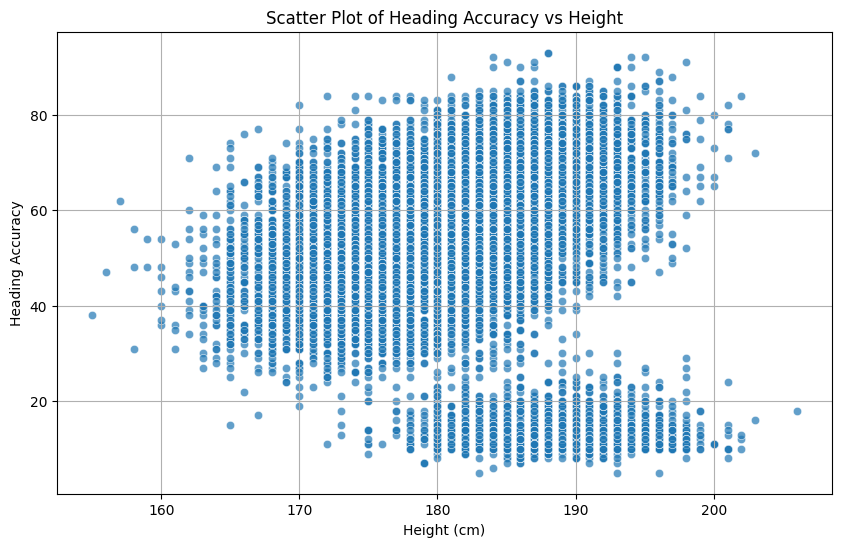

In [316]:




# Drop rows with NaN values in the columns of interest
data = data.dropna(subset=['Heading Accuracy', 'Height'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Heading Accuracy', data=data, alpha=0.7)
plt.title('Scatter Plot of Heading Accuracy vs Height')
plt.xlabel('Height (cm)')
plt.ylabel('Heading Accuracy')
plt.grid(True)
plt.show()


There seems to be a correlation between height and heading accuracy. Taller players seem to have a higher heading accuracy

#### What is the relationship between weight and speed

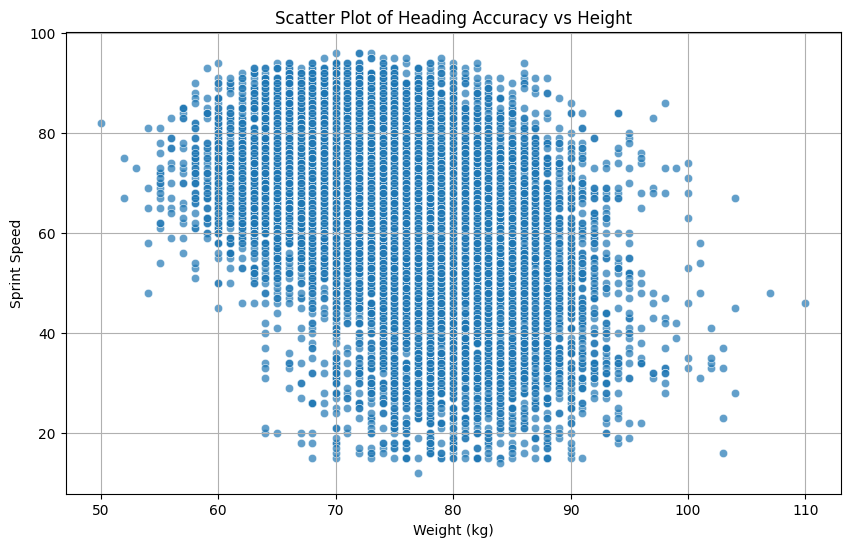

In [317]:
# Drop rows with NaN values in the columns of interest
data = data.dropna(subset=['Sprint Speed', 'Weight'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Sprint Speed', data=data, alpha=0.7)
plt.title('Scatter Plot of Heading Accuracy vs Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Sprint Speed')
plt.grid(True)
plt.show()

There seems to be a correlation between weight and Sprint speed. Heavier players seem to be slower

In [275]:
data['Weight']

0        72
1        83
2        87
3        70
4        68
         ..
18974    66
18975    65
18976    74
18977    69
18978    75
Name: Weight, Length: 18979, dtype: int64

In [276]:
data['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

####  Based on the 'Joined' column, check which players have been playing at a club for more than 10 years! Seperate the Joined column into three: Day joined, month joined and year joined

In [277]:
data['Joined'] = pd.to_datetime(data['Joined'], errors= 'coerce')
data['Joined_Day'] = data['Joined'].dt.day
data['Joined_Month'] = data['Joined'].dt.month
data['Joined_Year'] = data['Joined'].dt.year

In [ ]:
data[['Joined', 'Joined_Day', 'Joined_Month', 'Joined_Year']]

data['Duration'] = 2011 - data['Joined_Year']

In [308]:
data['Duration'] = 2021 - data['Joined_Year']
data[data['Duration'] > 10]


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,SHO,PAS,DRI,DEF,PHY,Hits,Joined_Day,Joined_Month,Joined_Year,Duration
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,92,91,95,38,65,771.0,1,7,2004,17
15,165153,K. Benzema,Karim Benzema,https://cdn.sofifa.com/players/165/153/21_60.png,http://sofifa.com/player/165153/karim-benzema/...,France,32,89,89,Real Madrid,...,85,81,86,40,76,216.0,9,7,2009,12
16,155862,Sergio Ramos,Sergio Ramos García,https://cdn.sofifa.com/players/155/862/21_60.png,http://sofifa.com/player/155862/sergio-ramos-g...,Spain,34,89,89,Real Madrid,...,70,76,73,88,85,212.0,1,8,2005,16
23,202126,H. Kane,Harry Kane,https://cdn.sofifa.com/players/202/126/21_60.png,http://sofifa.com/player/202126/harry-kane/210...,England,26,88,89,Tottenham Hotspur,...,91,80,80,47,83,332.0,1,7,2010,11
39,138956,G. Chiellini,Giorgio Chiellini,https://cdn.sofifa.com/players/138/956/21_60.png,http://sofifa.com/player/138956/giorgio-chiell...,Italy,35,87,87,Juventus,...,46,58,60,90,79,130.0,1,7,2005,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16064,256291,M. Haeder,Matthias Haeder,https://cdn.sofifa.com/players/256/291/21_60.png,http://sofifa.com/player/256291/matthias-haede...,Germany,31,59,59,SC Verl,...,57,45,61,25,58,1.0,1,11,2010,11
16109,254704,K. Miura,Kazuyoshi Miura,https://cdn.sofifa.com/players/254/704/21_60.png,http://sofifa.com/player/254704/kazuyoshi-miur...,Japan,53,59,59,Yokohama FC,...,63,55,60,19,47,125.0,1,7,2005,16
16519,248760,J. Popelard,John Popelard,https://cdn.sofifa.com/players/248/760/21_60.png,http://sofifa.com/player/248760/john-popelard/...,France,34,58,58,FC Chambly Oise,...,45,55,57,49,59,NaN,1,7,2010,11
16709,219936,M. Al Wakid,Mohammed Al Wakid,https://cdn.sofifa.com/players/219/936/21_60.png,http://sofifa.com/player/219936/mohammed-al-wa...,Saudi Arabia,28,57,57,Al Hilal,...,57,53,55,42,55,NaN,1,10,2009,12


206 players have been playing for a club for more than 10 years. Lionel messi has the highest duration having played for Barcelona for 17 years

#### Convert the wage, value and release clause column to integer by removing the £ sign. Convert rows with 'K' representing 1000 and 'M' representing million to integer values

In [281]:
def convert_value(value):
    if isinstance(value, str):
        # Remove currency symbol if present
        value = value.replace('€', '')
        
        # Check if value contains 'M' (for millions) or 'K' (for thousands)
        if 'M' in value:
            value = value.replace('M', '')
            try:
                total = float(value) * 1000000
                return int(total)
            except ValueError:
                return None  # or handle the error as needed

        elif 'K' in value:
            value = value.replace('K', '')
            try:
                total = float(value) * 1000
                return int(total)
            except ValueError:
                return None  # or handle the error as needed
        
        # Handle plain numeric values
        try:
            return int(float(value))
        except ValueError:
            return None  # or handle the error as needed
    
    return None


data['Value'] = data['Value'].apply(convert_value)
data['Wage'] = data['Wage'].apply(convert_value)
data['Release Clause'] = data['Release Clause'].apply(convert_value)

In [294]:
data[['Value', 'Wage', 'Release Clause', ]]

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000
...,...,...,...
18974,100000,1000,70000
18975,130000,500,165000
18976,120000,500,131000
18977,100000,2000,88000


### Which players are highly valuable but still underpaid (on low wages)?
Below is a scatter plot showing the wage vs value. A link to the tableau visualization can also be found by clicking this [link](https://public.tableau.com/views/ScatterplotofWagevsValue/Sheet4?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) to show the specific player by hovering over the points on the scatter plot.

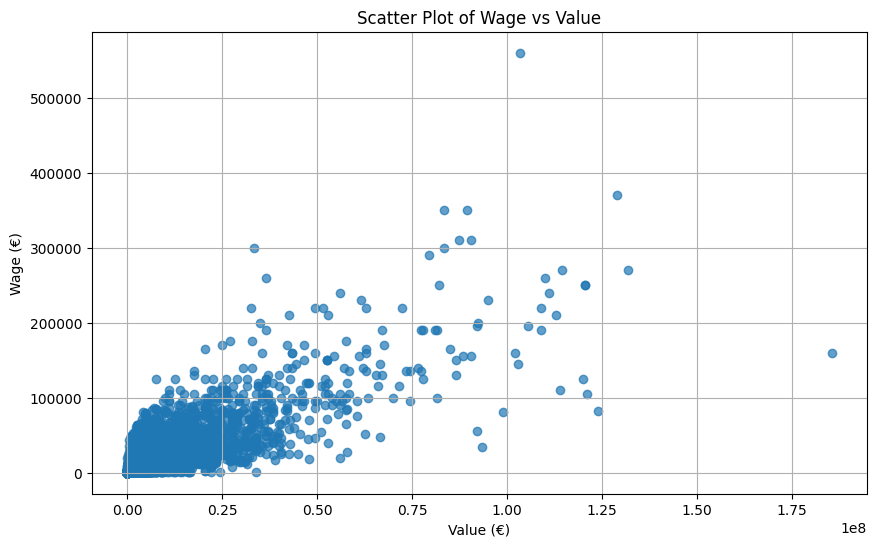

In [315]:

plt.figure(figsize=(10, 6))
plt.scatter(data['Value'], data['Wage'], alpha=0.7)
plt.title('Scatter Plot of Wage vs Value')
plt.xlabel('Value (€)')
plt.ylabel('Wage (€)')
plt.grid(True)
plt.show()

#### Convert the hits column to integer by converting rows with 'K' representing 1000 and 'M' representing million to integer values

In [286]:
def convert_hits(value):
    if isinstance(value, str):
        # Check if value contains 'M' (for millions) or 'K' (for thousands)
        if 'M' in value:
            value = value.replace('M', '')
            try:
                total = float(value) * 1000000
                return int(total)
            except ValueError:
                return None  # or handle the error as needed

        elif 'K' in value:
            value = value.replace('K', '')
            try:
                total = float(value) * 1000
                return int(total)
            except ValueError:
                return None  # or handle the error as needed
        
        # Handle plain numeric values
        try:
            return int(float(value))
        except ValueError:
            return None  # or handle the error as needed
    
    return None

data['Hits'] = data['Hits'].apply(convert_hits)

In [287]:
data['Hits'].head()

0    771.0
1    562.0
2    150.0
3    207.0
4    595.0
Name: Hits, dtype: float64

#### Remove the new line characters from the club column to have a better view of the clubs

In [288]:
data['Club'] = data['Club'].str.replace('\n', '', regex=False)

In [289]:
data

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_Day,Joined_Month,Joined_Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,85,92,91,95,38,65,771.0,1,7,2004
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,89,93,81,89,35,77,562.0,10,7,2018
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,87,92,78,90,52,90,150.0,16,7,2014
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,76,86,93,88,64,78,207.0,30,8,2015
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,91,85,86,94,36,59,595.0,3,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,...,64,28,26,38,48,51,NaN,13,7,2018
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,...,64,40,48,49,35,45,NaN,1,8,2020
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,Derry City,...,63,39,44,46,40,53,NaN,8,3,2019
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,Dalian YiFang FC,...,58,49,41,49,30,44,NaN,22,9,2020


In [290]:
data

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_Day,Joined_Month,Joined_Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,85,92,91,95,38,65,771.0,1,7,2004
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,89,93,81,89,35,77,562.0,10,7,2018
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,87,92,78,90,52,90,150.0,16,7,2014
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,76,86,93,88,64,78,207.0,30,8,2015
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,91,85,86,94,36,59,595.0,3,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,...,64,28,26,38,48,51,NaN,13,7,2018
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,...,64,40,48,49,35,45,NaN,1,8,2020
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,Derry City,...,63,39,44,46,40,53,NaN,8,3,2019
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,Dalian YiFang FC,...,58,49,41,49,30,44,NaN,22,9,2020


#### Load the data to a csv file to proceed to tableau for visualizations

In [292]:
data.to_csv('C:/Users/emmah/Desktop/Repositories/Data_analysis/Cleaned_fifa21_data.csv', index= False)

####  The following visualization from tableau shows the goegraphical distribution of players by country. The link to view the actual number of players by hovering over the country can be found by clicking [here](https://public.tableau.com/shared/YDQRPTD2P?:display_count=n&:origin=viz_share_link)
![alt text](Geographical_distibution_of_players.png)
